![logo](https://github.com/ecmwf-projects/copernicus-training-c3s/blob/main/img/LogoLine_horizon_C3S.png?raw=1)

<br>

# Analysis of September 2020 European Heatwave using ERA5 Climate Reanalysis Data from C3S

In September 2020, a record-breaking heatwave occured in large parts of western Europe, ([see a description here](https://climate.copernicus.eu/september-brings-record-breaking-warm-temperatures-and-low-sea-ice)). The city of Lille in northern France for example experienced its hottest day in September 2020 since records began in 1945. In this tutorial we will analyse this event with data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S).

The tutorial comprises the following steps:

1. Search, download and view data
2. View daily maximum 2m temperature for September 2020
3. Compare maximum temperatures with climatology

![logo](https://github.com/ecmwf-projects/copernicus-training-c3s/blob/main/img/Temp_records_banner.png?raw=1)

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training-c3s/main?labpath=reanalysis-heatwave.ipynb">
        <img src = "https://mybinder.org/badge.svg" alt = "Binder"></th>
    <th><a href="https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-projects/copernicus-training-c3s/blob/main/reanalysis-heatwave.ipynb">
        <img src = "https://kaggle.com/static/images/open-in-kaggle.svg" alt = "Kaggle"></th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/copernicus-training-c3s/blob/main/reanalysis-heatwave.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
  </tr>
</table>

<br>

## Search, download and view data

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various python libraries that we will need.

#### Install CDS API

To install the CDS API, run the following command. We use an exclamation mark to pass the command to the shell (not to the Python interpreter).

In [4]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.5 MB/s eta 0:00:00


#### Import libraries

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [5]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3
urllib3.disable_warnings()

#### Enter your CDS API key

We will request data from the Climate Data Store (CDS) programmatically with the help of the CDS API. Let us make use of the option to manually set the CDS API credentials. First, you have to define two variables: `URL` and `KEY` which build together your CDS API key. The string of characters that make up your KEY include your personal User ID and CDS API key. To obtain these, first register or login to the CDS (https://cds.climate.copernicus.eu), then visit https://cds.climate.copernicus.eu/how-to-api and copy the string of characters listed after "key:". Replace the `#########` below with this string.

In [7]:
URL = 'https://cds.climate.copernicus.eu/api'
KEY = '78f20dcf-877b-4764-b91a-54509980fee2'

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [8]:
DATADIR = './'

#### Search for data

To search for data, visit the CDS website: https://cds.climate.copernicus.eu. To facilitate your search you can use keywords, or apply various filters. The data we are going to use in this exercise is the `ERA5 reanalysis data on single levels from 1979 to present`.

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. These can all be selected in the **"Download data"** tab. In this tab a form appears in which we will select the following parameters to download. We will choose a subset area of 1x1 degrees, corresponding to a region of around 111km North/South and 72km East/West in Belgium and Northern France, around the city of Lille:

- Product type: `Reanalysis`
- Variable: `2m temperature`
- Year: `all`
- Month: `September`
- Day: `all`
- Time: `all`
- Geographical area: `North: 51`, `East: 4`, `South: 50`, `West: 3`
- Format: `NetCDF`

![logo](https://github.com/ecmwf-projects/copernicus-training-c3s/blob/main/img/Notebook3_data.png?raw=1)

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below) ...

#### Download data

... having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory. However, before you run the cell below, the **terms and conditions** of this particular dataset need to have been accepted in the CDS. The option to view and accept these conditions is given at the end of the download form, just above the **"Show API request"** option.

In [9]:
c = cdsapi.Client(url=URL, key=KEY)
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'data_format': 'netcdf_legacy',
        'variable': '2m_temperature',
        'year': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
        ],
        'month': '09',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            51, 3, 50,
            4,
        ],
    },
    f'{DATADIR}NFrance_hourly_Sep.nc')

2025-10-04 07:13:03,908 INFO Request ID is 78afb6be-33f1-4420-9eef-765e7943955c
INFO:ecmwf.datastores.legacy_client:Request ID is 78afb6be-33f1-4420-9eef-765e7943955c
2025-10-04 07:13:04,071 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-10-04 07:13:18,193 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-10-04 07:49:33,927 INFO The 'netcdf_legacy' format is deprecated and no longer supported. Users are encouraged to update workflows to use the updated, and CF compliant, 'netcdf' option.
INFO:ecmwf.datastores.legacy_client:The 'netcdf_legacy' format is deprecated and no longer supported. Users are encouraged to update workflows to use the updated, and CF compliant, 'netcdf' option.
2025-10-04 07:51:34,587 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


41becdc81eaccadae976b06c8d46b857.nc:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

'./NFrance_hourly_Sep.nc'

#### Inspect Data

We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. To read and process this data we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an [xarray.Dataset](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.html).

In [10]:
filename = f'{DATADIR}NFrance_hourly_Sep.nc'
# Create Xarray Dataset
ds = xr.open_dataset(filename)

Now we can query our newly created Xarray dataset ...

In [11]:
ds

<xarray.Dataset> Size: 6MB
Dimensions:    (time: 30240, latitude: 5, longitude: 5)
Coordinates:
  * longitude  (longitude) float32 20B 3.0 3.25 3.5 3.75 4.0
  * latitude   (latitude) float32 20B 51.0 50.75 50.5 50.25 50.0
  * time       (time) datetime64[ns] 242kB 1979-09-01 ... 2020-09-30T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float64 6MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2025-10-04 07:49:24 GMT by grib_to_netcdf-2.42.0: grib_to_n...

We see that the dataset has one variable called **"t2m"**, which stands for "2 metre temperature", and three coordinates of **longitude**, **latitude** and **time**.

Select the icons to the right of the table above to expand the attributes of the coordinates and data variables. What are the units of the temperature data?

While an Xarray **dataset** may contain multiple variables, an Xarray **data array** holds a single variable (which may still be multi-dimensional) and its coordinates. To make the processing of the **t2m** data easier, we convert in into an Xarray data array:

In [12]:
da = ds['t2m']

Let's convert the units of the 2m temperature data from Kelvin to degrees Celsius. The formula for this is simple: degrees Celsius = Kelvin - 273.15

In [13]:
t2m_C = da - 273.15

## View daily maximum 2m temperature for September 2020

As a next step, let us visualize the daily maximum 2m air temperature for September 2020. From the graph, we should be able to identify which day in September was hottest in the area around Lille.

First we average over the subset area:

> **Note:** The size covered by each data point varies as a function of latitude. We need to take this into account when averaging. One way to do this is to use the cosine of the latitude as a proxy for the varying sizes.

In [14]:
weights = np.cos(np.deg2rad(t2m_C.latitude))
weights.name = "weights"
t2m_C_weighted = t2m_C.weighted(weights)

In [15]:
Lille_t2m = t2m_C_weighted.mean(["longitude", "latitude"])

Now we select only the data for 2020:

In [16]:
Lille_2020 = Lille_t2m.sel(time='2020')

We can now calculate the max daily 2m temperature for each day in September 2020:

In [17]:
Lille_2020_max = Lille_2020.groupby('time.day').max('time')

Let's plot the results in a chart:

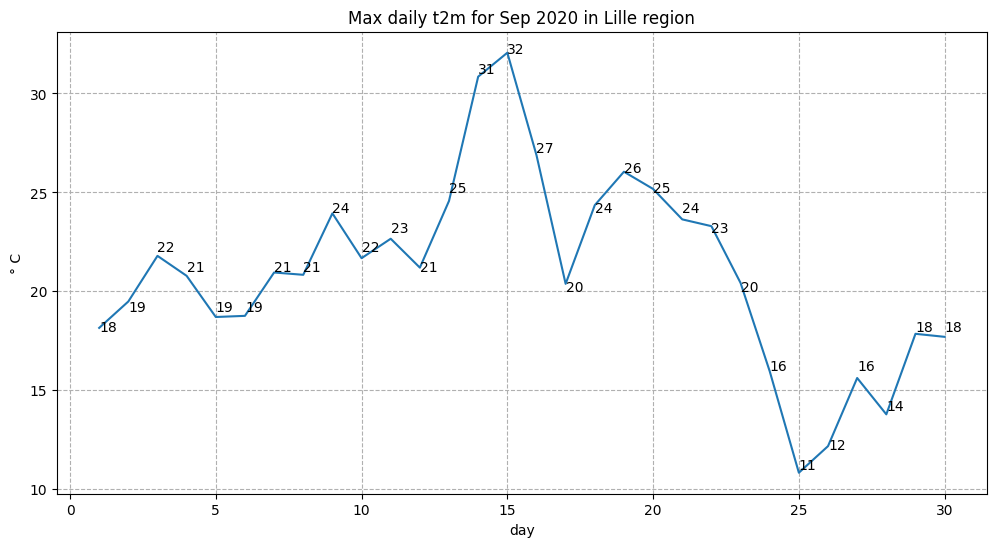

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.plot(Lille_2020_max.day, Lille_2020_max)
ax.set_title('Max daily t2m for Sep 2020 in Lille region')
ax.set_ylabel('° C')
ax.set_xlabel('day')
ax.grid(linestyle='--')
for i,j in zip(Lille_2020_max.day, np.around(Lille_2020_max.values, 0).astype(int)):
    ax.annotate(str(j),xy=(i,j))

In [ ]:
print('The maximum temperature in September 2020 in this area was',
      np.around(Lille_2020_max.max().values, 1), 'degrees Celsius.')

The maximum temperature in September 2020 in this area was 32.1 degrees Celsius.


Which day in September had the highest maximum temperature?

Is this typical for Northern France? How does this compare with the long term average? We will seek to answer these questions in the next section.

## Compare maximum temperatures with climatology
We will now seek to discover just how high the temperature for Lille in mid September 2020 was when compared with typical values exptected in this region at this time of year. To do that we will calculate the climatology of maximum daily 2m temperature for each day in September for the period of 1979 to 2019, and compare these with our values for 2020.

First we select all data prior to 2020:

In [ ]:
Lille_past = Lille_t2m.loc['1979':'2019']

Now we calculate the climatology for this data, i.e. the average values for each of the days in September for a period of several decades (from 1979 to 2019).

To do this, we first have to extract the maximum daily value for each day in the time series:

In [ ]:
Lille_max = Lille_past.resample(time='D').max().dropna('time')

We will then calculate various quantiles of the maximum daily 2m temperatures for the 40 year time series for each day in September:

In [ ]:
Lille_max_max = Lille_max.groupby('time.day').max()
Lille_max_min = Lille_max.groupby('time.day').min()
Lille_max_mid = Lille_max.groupby('time.day').quantile(0.5)

Let's plot this data. We will plot the, maximum, minimum and 50th quantile of the maximum daily temperature to have an idea of the expected range in this part of France in September, and compare this range with the values for 2020:

C:\Users\cxcs\AppData\Local\Temp/ipykernel_5360/21074062.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(Lille_2020_max.day, Lille_2020_max, 'bo-', color='darkred', label='Daily max t2m Sep 2020')


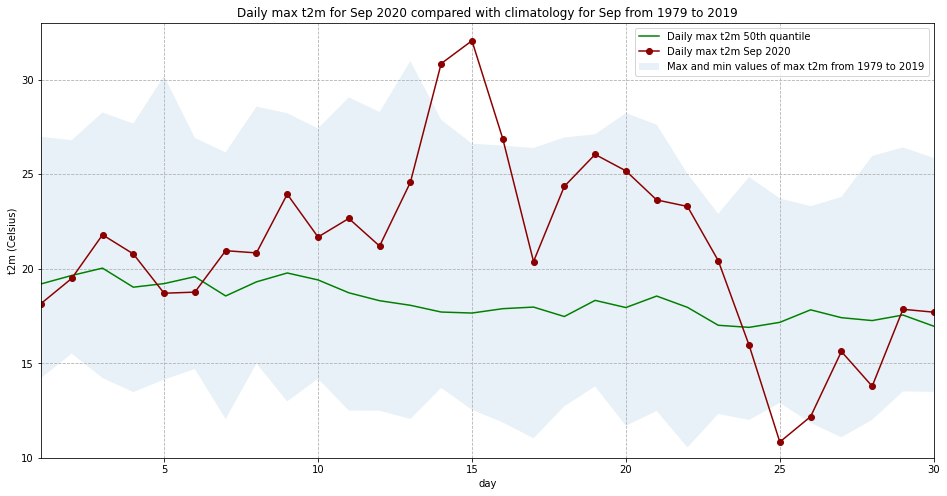

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = plt.subplot()

ax.plot(Lille_2020_max.day, Lille_max_mid, color='green', label='Daily max t2m 50th quantile')
ax.plot(Lille_2020_max.day, Lille_2020_max, 'bo-', color='darkred', label='Daily max t2m Sep 2020')
ax.fill_between(Lille_2020_max.day, Lille_max_max, Lille_max_min, alpha=0.1,
                label='Max and min values of max t2m from 1979 to 2019')

ax.set_xlim(1,30)
ax.set_ylim(10,33)
ax.set_title('Daily max t2m for Sep 2020 compared with climatology for Sep from 1979 to 2019')
ax.set_ylabel('t2m (Celsius)')
ax.set_xlabel('day')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.grid(linestyle='--')

fig.savefig(f'{DATADIR}Max_t2m_clim_Sep_Lille.png')

Interestingly, we see from this plot that while the temperatures from 14 to 16 Sep 2020 were the highest in the ERA5 dataset, on 25 September 2020, the lowest of the maximum temperatures was recorded for this dataset.

We will now look more closely at the probability distribution of maximum temperatures for 15 September in this time period. To do this, we will first select only the max daily temperature for 15 September, for each year in the time series:

In [ ]:
Lille_max = Lille_max.dropna('time', how='all')
Lille_15 = Lille_max[14::30]

We will then plot the histogram of this:

(array([ 2.,  3., 11.,  6.,  7.,  5.,  1.,  2.,  3.,  1.]),
 array([12.54313564, 13.95039225, 15.35764885, 16.76490545, 18.17216206,
        19.57941866, 20.98667526, 22.39393187, 23.80118847, 25.20844507,
        26.61570168]),
 <BarContainer object of 10 artists>)

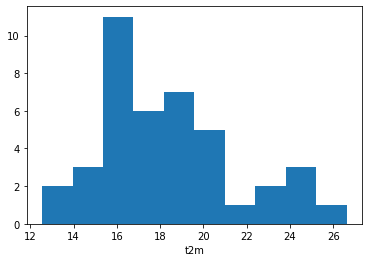

In [ ]:
Lille_15.plot.hist()

Look at the range of maximum temperatures for 15 September in the period from 1979 to 2019. Has the temperature in this period ever exceeded that of 15 September 2020?

The histogram shows the distribution of maximum temperature of one day in each year of the time series, which corresponds to 41 samples. In order to increase the number of samples, let's plot the histogram of maximum temperatures on 15 September, plus or minus three days. This would increase our number of samples by a factor of seven.

To do this, we first need to produce an index that takes the maximum 2m air temperature values from 12 to 18 September (15 September +/- three days) from every year in the time series. The first step is to initiate three numpy arrays:
* `years`: with the number of years [0:40]
* `days_in_sep`: index values of day range [11:17]
* `index`: empty numpy array with 287 (41 years * 7) entries


In [ ]:
years = np.arange(41)
days_in_sep = np.arange(11,18)
index = np.zeros(287)

In a next step, we then loop through each entry of the `years` array and fill the empty `index` array year by year with the correct indices of the day ranges for each year. The resulting array contains the index values of interest.

In [ ]:
for i in years:
    index[i*7:(i*7)+7] = days_in_sep + (i*30)
index = index.astype(int)

We then apply this index to filter the array of max daily temperature from 1979 to 2019. The resulting object is an array of values representing the maximum 2m air temperature in Lille between 12 and 18 September for each year from 1979 to 2019:

In [ ]:
Lille_7days = Lille_max.values[index]

Now we can plot the histogram of maximum daily temperatures in the days 12-18 September from 1979-2019:

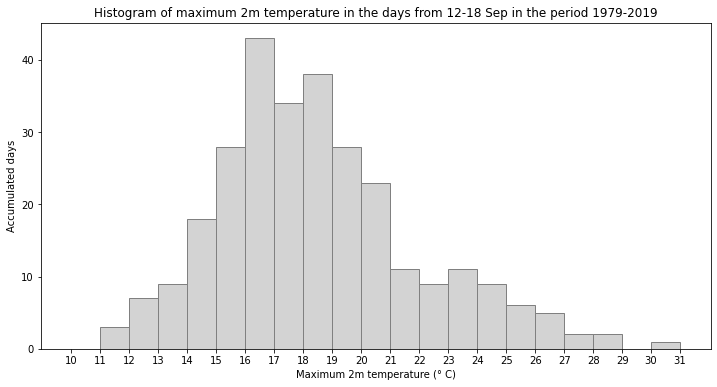

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.hist(Lille_7days, bins = np.arange(10,32,1), color='lightgrey', ec='grey')
ax.set_title('Histogram of maximum 2m temperature in the days from 12-18 Sep in the period 1979-2019')
ax.set_xticks(np.arange(10,32,1))
ax.set_ylabel('Accumulated days')
ax.set_xlabel('Maximum 2m temperature (° C)')

fig.savefig(f'{DATADIR}Hist_max_t2m_mid-Sep_1979-2019.png')

In the histogram above, you see that even if we take an increased sample covering a wider temporal range, the maximum daily temperature still never reached that of 15 September 2020. To increase the sample even further, you could include data from a longer time period. The C3S reanalysis dataset now extends back to 1940 and is accessible here [ERA5 hourly data on single levels from 1940 to present](https://cds.climate.copernicus.eu/datasets?q=era5+hourly+single+levels).

<hr>